In [ ]:
# default_exp plotting

In [ ]:
#export
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

In [ ]:
#export
def plot_2d_sta(sta):
    sta = np.array(sta)
    if len(sta.shape) == 2:
        sta = [sta]
    fig = plt.figure(figsize=(20,4+len(sta)//8*2))
    gs = gridspec.GridSpec(len(sta)//8 + 1, 8)    
    for i, frame in enumerate(sta):
        ax1 = plt.subplot(gs[i//8, i%8])
        ax1.imshow(frame, cmap='gray',vmin=-1, vmax=1)

In [ ]:
from theonerig.core import *
from theonerig.processing import *
from theonerig.utils import *
from os.path import join
import matplotlib.pyplot as plt
vivo_2p_dir = "./files/vivo_2p"
reM = import_record(join(vivo_2p_dir, "record_master.h5"))
pipe = Data_Pipe(reM, ["checkerboard", "eye_tracking", "S_matrix"], ["stim_inten", "eye_track", "spike_counts"])
pipe += "checkerboard"
result_sta = process_sta_batch(eyetrack_stim_inten(pipe[0]["stim_inten"], pipe[0]["eye_track"]), 
                               pipe[0]["spike_counts"], Hw=40)

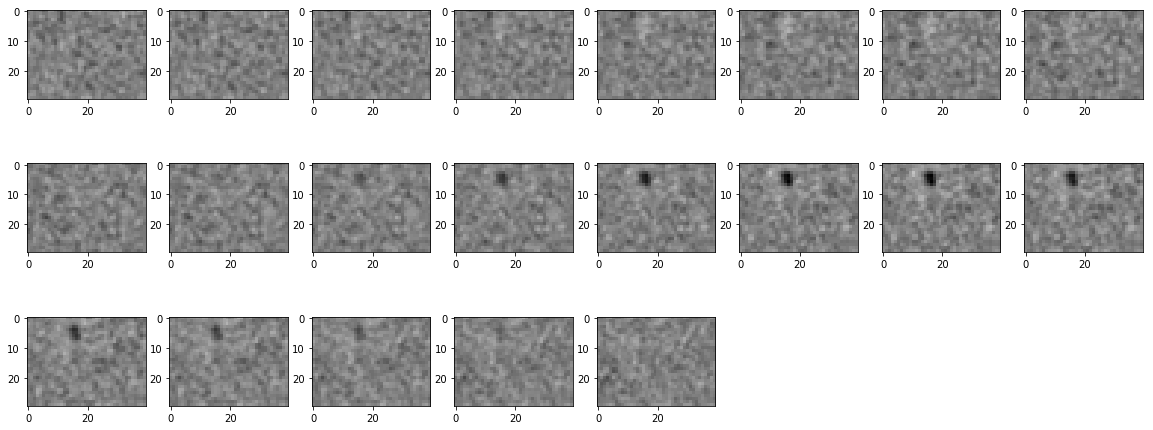

In [ ]:
plot_2d_sta(result_sta[0][::2])

In [ ]:
def plot_cross_correlation(correlation_array, threshold=.1  ,two_sided=True, figsize=(30,30)):
    n_cell = correlation_array.shape[0]
    _min,_max = np.min(correlation_array), np.max(correlation_array)
    thresh = (_max-_min) * threshold
    fig = plt.figure(figsize=figsize)
    for i in range(n_cell):
        for j in range(i, n_cell):
            c = "#1f77b4"
            if np.max(correlation_array[i,j])-np.min(correlation_array[i,j]) > thresh:
                c = "red"
            for k in range(2 if two_sided else 1):
                if k==0:
                    ax = fig.add_subplot(n_cell,n_cell,i*n_cell+j+1, ylim=(_min,_max), label=str(i*n_cell+j+1))
                else:
                    ax = fig.add_subplot(n_cell,n_cell,j*n_cell+i+1, ylim=(_min,_max), label="b"+str(i*n_cell+j+1))
                plt.plot(correlation_array[i,j], c=c)
                plt.axis('off')
                if i == 0 and k==0:
                    ax.set_title(str(j))  
                elif i == 0 and k==1:
                    ax.set_title(str(j), pad =-50, loc="left")  
                elif i == j:
                    ax.set_title(str(j), pad =-50, loc="center")

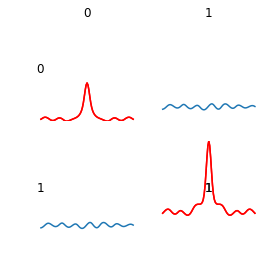

In [ ]:
pipe = Data_Pipe(reM, ["S_matrix"])
pipe += "checkerboard"
checker_corr = cross_correlation(pipe[0]["S_matrix"])
plot_cross_correlation(checker_corr, threshold=.3, figsize=(4,4))

In [ ]:
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_utils.ipynb.
Converted 02_processing.ipynb.
Converted 03_modelling.ipynb.
Converted 04_plotting.ipynb.
Converted index.ipynb.
